In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

import shapefile as shp
import os
cwd = os.getcwd()
print(cwd)
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Io\Documents\Cours\EO\projet\couches_qgis


In [2]:
sample21 = shp.Reader("C:/Users/Io/Documents/Cours/EO/projet/dataGEE/sample21.shp") 
sample21_sr = sample21.shapeRecords()
test = sample21_sr[0]
print(test.record)
print(len(sample21_sr))
print(test.shape.points)

Record #0: [0.0044, 0.0, 0.3837, 0.19815, 0.23339471, 0.71202976, 0.28845, 0.1569, 0.01565, 0.0, 0.63495231, 0.0, 0.0, 0.0278, 0.04265, 0.0823, 0.0064, 0.062, 0.1376, 0.29885, 0.34505, 0.3686, 0.3771, 0.0, 0.0085, 0.0004, 0.40285441]
62
[[9.055961294973104, 45.847631565957464]]


In [3]:
boi = ['ndvi','Gndvi','nbr','cre']
bands = sample21.fields
indices = [[i,sample21.fields[i][0]]  for i in range(len(bands)) if sample21.fields[i][0] in boi]
indices

[[5, 'cre'], [6, 'ndvi'], [11, 'Gndvi'], [27, 'nbr']]

In [4]:
#start code
sample21 = shp.Reader("C:/Users/Io/Documents/Cours/EO/projet/dataGEE/sample21.shp") 
sample21_sr = sample21.shapeRecords()
no_samples = len(sample21.shapeRecords())
boi = 'ndvi'
sample_ndvi21 = []
index_boi = [[j,sample21.fields[j][0]]  for j in range(len(bands)) if sample21.fields[j][0] in boi]
j21 = index_boi[0][0]
print(j21)
sample_ndvi21 = [(sample21_sr[i]).record[j21] for i in range(no_samples)]
print(sample_ndvi21)

6
[0.28845, 0.1979, 0.20865, 0.20225, 0.19355, 0.20735, 0.21095, 0.2623, 0.221, 0.2012, 0.2585, 0.2123, 0.28365, 0.2601, 0.23125, 0.23855, 0.2336, 0.2615, 0.27735, 0.2122, 0.27035, 0.26775, 0.20085, 0.19005, 0.1864, 0.2119, 0.1953, 0.21335, 0.21125, 0.1814, 0.2181, 0.19315, 0.19535, 0.2276, 0.2034, 0.2756, 0.3128, 0.2559, 0.2507, 0.2724, 0.2118, 0.1937, 0.18155, 0.19495, 0.2217, 0.19395, 0.2317, 0.2261, 0.17585, 0.26675, 0.2592, 0.1901, 0.2176, 0.10185, 0.1943, 0.21455, 0.20195, 0.2074, 0.2264, 0.18535, 0.23345, 0.22695]


In [5]:
#start code
sample22 = shp.Reader("C:/Users/Io/Documents/Cours/EO/projet/dataGEE/sample22.shp") 
sample22_sr = sample22.shapeRecords()
no_samples = len(sample22.shapeRecords())
boi = 'ndvi'
sample_ndvi22 = []
index_boi = [[j,sample22.fields[j][0]]  for j in range(len(bands)) if sample22.fields[j][0] in boi]
j22 = index_boi[0][0]
print(j22)
sample_ndvi22 = [(sample22_sr[i]).record[j22] for i in range(no_samples)]
print(sample_ndvi22)

6
[0.3334, 0.2155, 0.2435, 0.2248, 0.2067, 0.2207, 0.222, 0.3266, 0.236, 0.204, 0.3387, 0.2211, 0.3521, 0.3227, 0.2516, 0.2495, 0.2459, 0.2692, 0.2876, 0.2237, 0.2791, 0.2923, 0.2179, 0.2166, 0.2366, 0.24, 0.2018, 0.22445, 0.21985, 0.192, 0.2232, 0.2089, 0.2015, 0.241, 0.2105, 0.3341, 0.3422, 0.26605, 0.2604, 0.2799, 0.2205, 0.1974, 0.20105, 0.21365, 0.2276, 0.214, 0.2408, 0.2218, 0.3348, 0.2702, 0.2761, 0.2093, 0.2176, 0.104, 0.20785, 0.2233, 0.2097, 0.2108, 0.2414, 0.195, 0.24715, 0.2395]


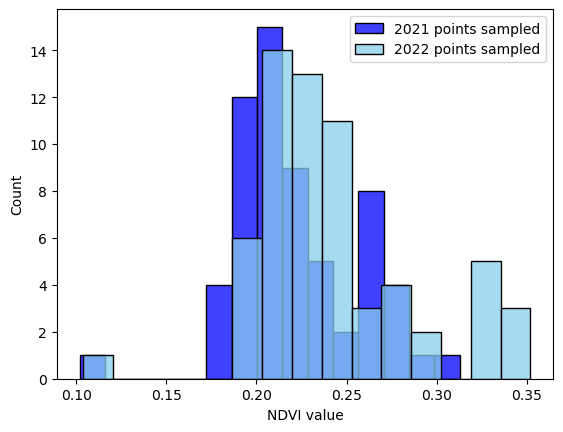

In [18]:
sns.histplot(sample_ndvi21 , bins = 15, color="blue", label = "2021 points sampled")
sns.histplot(sample_ndvi22, bins = 15, label = "2022 points sampled", color="skyblue")
plt.legend()
plt.xlabel('NDVI value')
plt.savefig('C:/Users/Io/Documents/Cours/EO/projet/images/ndvi_hist.png')

In [19]:
# statistical analysis not equal variance because of cloud cover between two years
import scipy

mean_ndvi21 = np.mean(sample_ndvi21)
mean_ndvi22 = np.mean(sample_ndvi22)
std_ndvi21 = np.std(sample_ndvi21)
std_ndvi22 = np.std(sample_ndvi22)
print('means', mean_ndvi21, mean_ndvi22, '\n', 'std', std_ndvi21, std_ndvi22)

print('welsh test',scipy.stats.ttest_ind(sample_ndvi21, sample_ndvi22, equal_var=False))
print('t test', scipy.stats.ttest_ind(sample_ndvi21, sample_ndvi22, equal_var=True))


means 0.2218282258064516 0.2420508064516129 
 std 0.03504857760328552 0.04583558405298953
welsh test TtestResult(statistic=-2.737315118601279, pvalue=0.007186696675981458, df=114.15966279886145)
t test TtestResult(statistic=-2.737315118601279, pvalue=0.007120918521813938, df=122.0)
